In [113]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from darts.datasets import AirPassengersDataset
from darts import TimeSeries

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\1_Bhiwadi\Book_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '13-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '14-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '15-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning: Parsing '16-01-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return tools.to_datetime(
C:\Users\91783\anaconda3\lib

,PM2.5
Date,
2021-01-01,228.53
2021-02-01,222.37
2021-03-01,128.14
2021-04-01,68.44
2021-05-01,62.51


In [115]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
        return np.array(X), np.array(Y)

In [116]:

train_size = 300
train,test = df.values[0:train_size,:], df.values[train_size:len(df.values),:]
look_back = 30 #create window size as look_back=30
test = np.append(test,np.repeat(test[-1,], look_back))
train = np.append(train,np.repeat(train[-1,],look_back))
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [117]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [118]:
model=model_rnn(look_back)

In [119]:
def call(c):
    history=model.fit(trainX,trainY, epochs=c, batch_size=30, verbose=2, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

    def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();
    
    train_score = model.evaluate(trainX, trainY, verbose=0)
    print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(train_score[1]), train_score[2]))
    test_score = model.evaluate(testX, testY, verbose=0)
    print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(test_score[1]), test_score[2]))
    model_loss(history)

Epoch 1/50
1/1 - 1s - loss: 952.2667 - mse: 952.2667 - mae: 30.8588 - val_loss: 3019.8511 - val_mse: 3019.8511 - val_mae: 54.9532 - 670ms/epoch - 670ms/step
Epoch 2/50
1/1 - 0s - loss: 189.5714 - mse: 189.5714 - mae: 13.7685 - val_loss: 1241.9860 - val_mse: 1241.9860 - val_mae: 35.2418 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 3.7225 - mse: 3.7225 - mae: 1.9294 - val_loss: 430.2162 - val_mse: 430.2162 - val_mae: 20.7417 - 20ms/epoch - 20ms/step
Epoch 4/50
1/1 - 0s - loss: 180.6642 - mse: 180.6642 - mae: 13.4411 - val_loss: 196.4741 - val_mse: 196.4741 - val_mae: 14.0169 - 19ms/epoch - 19ms/step
Epoch 5/50
1/1 - 0s - loss: 340.4027 - mse: 340.4027 - mae: 18.4500 - val_loss: 197.7878 - val_mse: 197.7878 - val_mae: 14.0637 - 18ms/epoch - 18ms/step
Epoch 6/50
1/1 - 0s - loss: 321.7394 - mse: 321.7394 - mae: 17.9371 - val_loss: 340.9031 - val_mse: 340.9031 - val_mae: 18.4636 - 18ms/epoch - 18ms/step
Epoch 7/50
1/1 - 0s - loss: 193.4447 - mse: 193.4447 - mae: 13.9084 - val_loss: 6

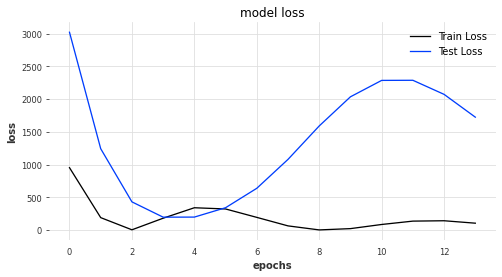

Epoch 1/100
1/1 - 0s - loss: 51.0493 - mse: 51.0493 - mae: 7.1449 - val_loss: 1337.3688 - val_mse: 1337.3688 - val_mae: 36.5701 - 37ms/epoch - 37ms/step
Epoch 2/100
1/1 - 0s - loss: 10.6584 - mse: 10.6584 - mae: 3.2647 - val_loss: 990.6578 - val_mse: 990.6578 - val_mae: 31.4747 - 19ms/epoch - 19ms/step
Epoch 3/100
1/1 - 0s - loss: 0.5724 - mse: 0.5724 - mae: 0.7566 - val_loss: 728.8566 - val_mse: 728.8566 - val_mae: 26.9973 - 19ms/epoch - 19ms/step
Epoch 4/100
1/1 - 0s - loss: 18.3635 - mse: 18.3635 - mae: 4.2853 - val_loss: 565.1429 - val_mse: 565.1429 - val_mae: 23.7727 - 19ms/epoch - 19ms/step
Epoch 5/100
1/1 - 0s - loss: 46.2009 - mse: 46.2009 - mae: 6.7971 - val_loss: 491.9974 - val_mse: 491.9974 - val_mae: 22.1810 - 18ms/epoch - 18ms/step
Epoch 6/100
1/1 - 0s - loss: 63.6252 - mse: 63.6252 - mae: 7.9765 - val_loss: 496.8526 - val_mse: 496.8526 - val_mae: 22.2902 - 20ms/epoch - 20ms/step
Epoch 7/100
1/1 - 0s - loss: 60.3048 - mse: 60.3048 - mae: 7.7656 - val_loss: 570.6052 - val_m

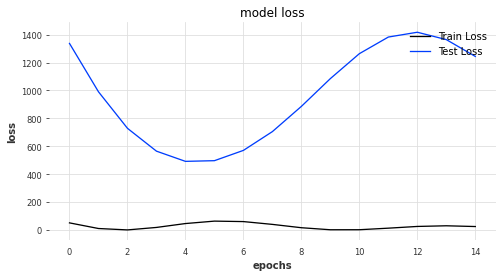

Epoch 1/150
1/1 - 0s - loss: 13.4951 - mse: 13.4951 - mae: 3.6736 - val_loss: 1088.2146 - val_mse: 1088.2146 - val_mae: 32.9881 - 37ms/epoch - 37ms/step
Epoch 2/150
1/1 - 0s - loss: 3.4508 - mse: 3.4508 - mae: 1.8576 - val_loss: 931.3021 - val_mse: 931.3021 - val_mae: 30.5172 - 20ms/epoch - 20ms/step
Epoch 3/150
1/1 - 0s - loss: 0.0137 - mse: 0.0137 - mae: 0.1172 - val_loss: 800.3764 - val_mse: 800.3764 - val_mae: 28.2909 - 17ms/epoch - 17ms/step
Epoch 4/150
1/1 - 0s - loss: 3.5948 - mse: 3.5948 - mae: 1.8960 - val_loss: 711.4288 - val_mse: 711.4288 - val_mae: 26.6726 - 17ms/epoch - 17ms/step
Epoch 5/150
1/1 - 0s - loss: 10.1099 - mse: 10.1099 - mae: 3.1796 - val_loss: 670.4722 - val_mse: 670.4722 - val_mae: 25.8935 - 17ms/epoch - 17ms/step
Epoch 6/150
1/1 - 0s - loss: 14.2676 - mse: 14.2676 - mae: 3.7772 - val_loss: 676.8207 - val_mse: 676.8207 - val_mae: 26.0158 - 17ms/epoch - 17ms/step
Epoch 7/150
1/1 - 0s - loss: 13.2277 - mse: 13.2277 - mae: 3.6370 - val_loss: 725.4275 - val_mse: 

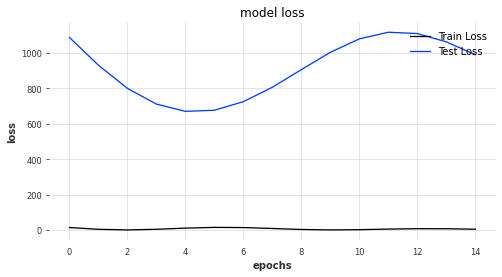

Epoch 1/200
1/1 - 0s - loss: 1.2070 - mse: 1.2070 - mae: 1.0986 - val_loss: 910.8135 - val_mse: 910.8135 - val_mae: 30.1797 - 34ms/epoch - 34ms/step
Epoch 2/200
1/1 - 0s - loss: 0.0027 - mse: 0.0027 - mae: 0.0517 - val_loss: 840.2258 - val_mse: 840.2258 - val_mae: 28.9866 - 17ms/epoch - 17ms/step
Epoch 3/200
1/1 - 0s - loss: 0.8298 - mse: 0.8298 - mae: 0.9110 - val_loss: 791.2002 - val_mse: 791.2002 - val_mae: 28.1283 - 17ms/epoch - 17ms/step
Epoch 4/200
1/1 - 0s - loss: 2.5611 - mse: 2.5611 - mae: 1.6004 - val_loss: 770.0227 - val_mse: 770.0227 - val_mae: 27.7493 - 16ms/epoch - 16ms/step
Epoch 5/200
1/1 - 0s - loss: 3.5992 - mse: 3.5992 - mae: 1.8971 - val_loss: 777.5823 - val_mse: 777.5823 - val_mae: 27.8852 - 16ms/epoch - 16ms/step
Epoch 6/200
1/1 - 0s - loss: 3.1410 - mse: 3.1410 - mae: 1.7723 - val_loss: 810.0311 - val_mse: 810.0311 - val_mae: 28.4610 - 17ms/epoch - 17ms/step
Epoch 7/200
1/1 - 0s - loss: 1.6562 - mse: 1.6562 - mae: 1.2869 - val_loss: 859.4105 - val_mse: 859.4105 -

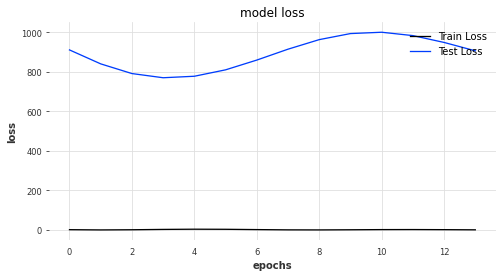

Epoch 1/250
1/1 - 0s - loss: 0.0172 - mse: 0.0172 - mae: 0.1311 - val_loss: 866.3589 - val_mse: 866.3589 - val_mae: 29.4340 - 37ms/epoch - 37ms/step
Epoch 2/250
1/1 - 0s - loss: 0.1699 - mse: 0.1699 - mae: 0.4121 - val_loss: 837.6324 - val_mse: 837.6324 - val_mae: 28.9419 - 16ms/epoch - 16ms/step
Epoch 3/250
1/1 - 0s - loss: 0.6575 - mse: 0.6575 - mae: 0.8108 - val_loss: 825.0278 - val_mse: 825.0278 - val_mae: 28.7233 - 18ms/epoch - 18ms/step
Epoch 4/250
1/1 - 0s - loss: 0.9708 - mse: 0.9708 - mae: 0.9853 - val_loss: 829.6898 - val_mse: 829.6898 - val_mae: 28.8043 - 17ms/epoch - 17ms/step
Epoch 5/250
1/1 - 0s - loss: 0.8357 - mse: 0.8357 - mae: 0.9142 - val_loss: 849.0844 - val_mse: 849.0844 - val_mae: 29.1391 - 17ms/epoch - 17ms/step
Epoch 6/250
1/1 - 0s - loss: 0.4033 - mse: 0.4033 - mae: 0.6351 - val_loss: 877.6714 - val_mse: 877.6714 - val_mae: 29.6255 - 18ms/epoch - 18ms/step
Epoch 7/250
1/1 - 0s - loss: 0.0537 - mse: 0.0537 - mae: 0.2316 - val_loss: 908.0599 - val_mse: 908.0599 -

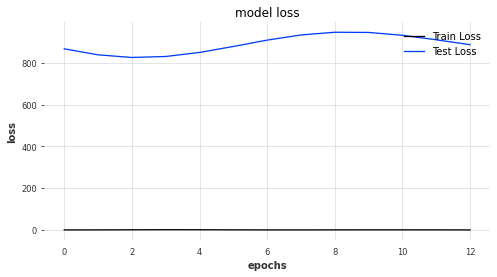

In [120]:
l=[50,100,150,200,250]
for i in l:
    call(i)

In [121]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

Train Root Mean Squared Error(RMSE): 0.09; Train Mean Absolute Error(MAE) : 0.09 
Test Root Mean Squared Error(RMSE): 29.77; Test Mean Absolute Error(MAE) : 29.77 


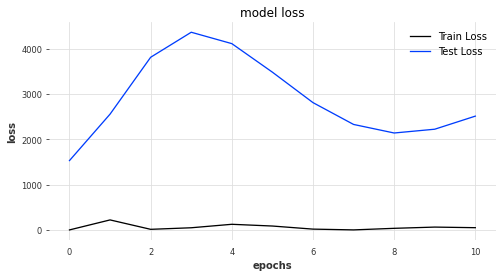

In [122]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [123]:
def prediction_plot(testY, test_predict,look_back):
    len_prediction=[x for x in range(len(testY)-look_back)]
    plt.plot(len_prediction, testY[:30], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[:30], 'r', label="prediction")
    plt.tight_layout() 
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [124]:
prediction_plot(testY, test_predict,look_back)

NameError: name 'test_predict' is not defined